In [1]:
#I couldn't get an account (from MS Azure account info: https://azure.microsoft.com/en-us/free/):

#What do I need to sign up?
#A phone number, a credit or debit card, and a Microsoft Account username. 
#Credit card information is used for identity verification. 
#You won’t be charged until you upgrade.

subscription_key = "<Subscription Key>"
assert subscription_key

In [2]:
#region check for the subscription key. When using a trial key, no need to make any changes.
#If we pay for the service. Probably our region would either be one of the following:
#East US - eastus.api.cognitive.microsoft.com
#East US 2 - eastus2.api.cognitive.microsoft.com
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

In [3]:
image_url = 'https://how-old.net/Images/faces2/main007.jpg'

In [4]:
#This cell no needed when having an API key
import json
with open('attributes.json') as fd:
    faces = json.load(fd)

In [5]:
import requests
from IPython.display import HTML

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }

params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'false',
}

#Uncoment these two lines when having an API key
#response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
#faces = response.json()

HTML("<font size='5'>Detected <font color='blue'>%d</font> faces in the image</font>"%len(faces))

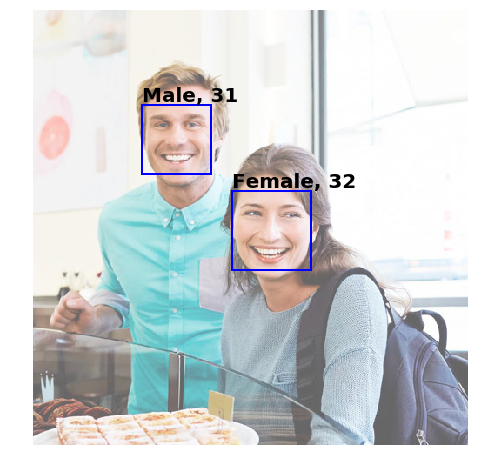

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")